<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tutorial 2: *Scikit-learn (Sklearn)***

</center>

### **Ketentuan:**

1.	Dokumen *template* tutorial dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe.
2.	Tutorial ini dirancang agar mahasiswa dapat menggunakan *library* yang akan digunakan dalam pengerjaan lab dan tugas yang akan datang.
3.	Tidak ada submisi dalam pelaksanaan tutorial. Silakan berdiskusi jika mengalami kesulitan. Meski demikian, diharapkan setelah pengerjaan tutorial ini mahasiswa dapat melakukan *task* yang diberikan di dalam tutorial secara mandiri.

# **A.	Scikit-learn Secara Umum**

Scikit-learn sudah disinggung di lab sebelumnya, namun belum ada penjelasan  tentang apa itu scikit-learn. **Scikit-learn (Sklearn)** merupakan sebuah *library* yang umum digunakan dalam pembelajaran mesin (*machine learning*) untuk bahasa pemrograman Python. Sklearn sendiri dibangun menggunakan beberapa *library* yang kita juga sudah kenal sebelumnya, yaitu numpy, scipy, dan matplotlib. Modul-modul yang disediakan di sklearn di antaranya:

| Nama modul | Kegunaan | 
| ----------- | --------- | 
| `sklearn.cluster` | menerapkan algoritma clustering | 
| `sklearn.covariance` | memperkirakan covariance fitur | 
| `sklearn.datasets` | memuat dataset populer yang disediakan oleh scikit-learn | 
| `sklearn.decomposition` | menerapkan algoritma dekomposisi matriks seperti PCA |
| `sklearn.ensemble` | menerapkan beberapa algoritma untuk klasifikasi dan regresi |
| `sklearn.feature_extraction` | mengekstrak fitur dari raw data |
| `sklearn.feature_selection` | menerapkan algoritma seleksi fitur |
| `sklearn.linear_model` | menerapkan beberapa macam model linear |
| `sklearn.metrics` | menghitung performa model dengan berbagai macam metric |
| `sklearn.model_selection` | menerapkan cross-validation |
| `sklearn.naive_bayes` | menerapkan algoritma Naive Bayes untuk klasifikasi |
| `sklearn.neighbors` | menerapkan algo KNN |
| `sklearn.pipeline` | menerapkan beberapa langkah pembuatan model di dalam satu pipeline |
| `sklearn.preprocessing` | melakukan label-encoding, scaling, normalisasi, dan beberapa preprocessing lainnya | 
| `sklearn.svm` | menerapkan algo Support Vector Machine |
| `sklearn.tree` | menerapkan algo Decision Tree |


Sklearn dibuat khusus untuk memodelkan data, yang meliputi membangun (*build*), melatih (*train*), dan mengevaluasi (*evaluate*) model. Untuk itu, tutorial kali akan berfokus bagaimana melakukan ketiga hal tersebut yang akan bermanfaat dalam pengerjaan lab dan tugas yang akan datang.

Model yang dapat dibangun menggunakan sklearn di antaranya decision tree, linear/logistic regression, support vector machine (SVM), dan masih banyak model yang lain. Informasi lebih lanjut dapat dilihat pada dokumentasi [Sklearn](https://scikit-learn.org/).

# **B. Dataset Exploratory**

*Dataset* yang digunakan untuk tutorial ini merupakan *dataset* wine. Deskripsi *dataset* tersedia di dokumen pdf pengantar tutorial ini

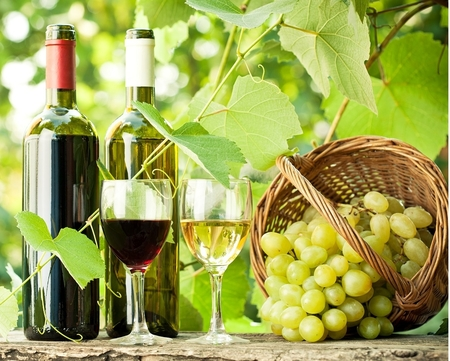

In [ ]:
import pandas as pd

In [ ]:
col = ['alcohol_type', 'alcohol_percentage', 'malic_acid', 'ash', 'alcanity_of_ash', 'magnesium', 'total_phenols', 
       'flavonoids', 'nonflavanoid_phenols', 'proanthocyanidins', 'color_intensity',
       'hue', 'OD280/OD315_of_diluted_wines', 'proline']
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
    header = None
    )
df.columns = col

In [ ]:
df

# **C. Membangun Sebuah Model**


Sebagai contoh, kita akan menggunakan model [K-Nearest Neighbor Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) atau biasa disebut sebagai KNN Classifier sebagai model untuk *dataset* wine. Penjelasan singkat mengenai model tersebut dapat diakses pada beberapa pranala berikut:
*   [KNN by StatQuest](https://www.youtube.com/watch?v=HVXime0nQeI&ab_channel=StatQuestwithJoshStarmer)
*   [KNN Intuitive](https://www.youtube.com/watch?v=0p0o5cmgLdE&ab_channel=IntuitiveMachineLearning)




Karena model tersebut sudah tersedia secara *built-in* dalam *library* sklearn, maka kita hanya perlu meng-*import* model tersebut.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn

Dalam membangun sebuah model *machine learning*, kita harus melakukan konfigurasi terkait beberapa ketentuan yang akan dipakai pada saat suatu model dijalankan. Untuk melakukan hal tersebut, kita dapat menggunakan suatu hal yang bernama *hyperparameter*. Setiap jenis model *machine learning* memiliki *hyperparameter*-nya masing-masing sesuai dengan cara algoritma tersebut berjalan. Untuk menentukan nilai dari suatu *hyperparameter*, kita dapat menentukanya secara manual atau menggunakan nilai *default* yang telah disediakan oleh *library* Sklearn.

Model KNN Classifier itu sendiri memiliki beberapa *hyperparameter* yang dapat digunakan antara lain adalah:

*   `n_neighbors`: berguna untuk menentukan berapa 'neighbors' yang akan diikutsertakan dalam proses *voting*
*   `wieghts`: berguna untuk menentukan *weigth function* pada saat melakukan prediksi. 
*   `n_jobs`: berguna untuk mendefinisikan berapa *processor* yang digunakan dalam menjalankan model
* dan lain lain.

Deskripsi lengkap mengenai *hyperparameter* yang dapat digunakan pada KNN Classifier dapat diakses pada pranala [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) di bagian 'parameters'

Pada tutorial kali ini, model KNN Classifier yang digunakan akan menggunakan satu *hyperparameter* yaitu 'n_neighbors'






In [ ]:
# Menginisasi model KNN Classifier

knn_classifier = knn(n_neighbors=3)


Untuk dapat membangun model, dataset perlu dibagi menjadi data (X) dan target (y). Data X berisi atribut *independent* yang akan digunakan untuk memprediksi y berisi attribut *dependent* yang menjadi target.

In [ ]:
# Mengambil attribut independent

X = df.drop(df.columns[0], axis=1)
X

In [ ]:
# Mengambil attribut dependent

y = df[0]
y

Setelah membagi dataset menjadi data dan target, kita juga perlu membagi dataset menjadi *training set* dan *test set*. *Training set* digunakan untuk melatih model menggunakan algoritma tertentu sehingga terbentuk model prediksi berdasarkan himpunan aturan tertentu. *Training set* bisa dibilang sebagai sumber belajar algoritma pemelajaran mesin. Model yang sudah dilatih, memiliki kemampuan untuk memprediksi data baru yang belum pernah dipelajarinya. *Test set* digunakan untuk mengukur seberapa baik model dalam menangani data yang belum pernah dipelajari sebelumnya. Pembagian data ini diperlukan agar kita mengetahui performa model kita.


Sklearn memiliki *package* <code>model_selection</code> yang memiliki *method* yang dapat membaginya secara acak. Salah satu metode yang dapat digunakan adalah <code>train_test_split</code> yang dapat digunakan untuk membagi suatu dataset secara acak menjadi dua kelompok yaitu *dataset traning* serta *dataset testing*. Proporsi pembagian dataset tersebut dapat diatur melalui parameter `test_size` pada method tersebut. Di contoh ini, 40% dataset akan digunakan sebagai *dataset testing* dan sisanya digunakan sebagai *dataset training*.

Penjelasan lengkap mengenai method train_test_split dapat diakses pada pranala [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.4, random_state=1
)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# **D. Melatih Sebuah Model**

Setelah membagi dataset menjadi *training set* dan *test set*, model siap dilatih. Untuk setiap model yang ada di *library* sklearn, terdapat fungsi <code>fit()</code> untuk melatih *training set* yang dimiliki. Pada KNN, proses *traning* yang dijalankan berbeda dengan beberapa model *machine learning* lainya karena proses tersebut bersifat trivial yang memiliki arti bahwa proses tersebut hanya menjadikan *training data* sebagai *lookup table* untuk melakukan klasifikasi tanpa ada proses komputasi khusus. Sementara, pada beberapa model *machine learning* lainya seperti SVM serta Random Forest, proses *training* merupakan suatu proses komputasi untuk meminimalkan/memaksimalkan suatu nilai tertentu.

In [ ]:
knn_classifier.fit(X_train, y_train)

# **E. Mengevaluasi Sebuah Model**

Setiap model di dalam Sklearn juga memiliki *method* <code>predict()</code> yang dapat digunakan untuk memprediksi nilai target dari suatu kumpulan data.

Dalam melakukan prediksi, model KNN Classifier akan mencari data latih terdekat (*neighbors*) pada *lookup table* dengan menghitung jarak data baru dengan data yang berada di *lookup table*. Data yang baru kemudian akan dilabeli dengan label yang sama dengan *neighbors* tersebut.

In [ ]:
# Melakukan prediksi terhadap data testing

y_pred = knn_classifier.predict(X_test)

In [ ]:
# Mencetak hasil prediksi

print(y_pred)

Untuk melakukan evaluasi sebuah model, kita dapat menggunakan beberapa metrik sebagai ukuran kuantatif baik/buruknya model yang digunakan. Dalam menentukan metrik apa yang cocok digunakan untuk mengevaluasi sebuah model, kita harus melihat masalah apa yang ingin diselesaikan dengan menggunakan model tersebut. Apabila masalah yang ingin diselesaikan berupa klasifikasi, maka beberapa metrik yang dapat digunakan adalah Accuracy, Precision, Recall, serta F-1 Score. Sementara apabila masalah yang ingin diselesaikan berupa regresi, maka beberapa metrik yang dapat digunakan antara lain adalah RMSE serta R2 Score.

Untuk menggunakan suatu metrik, *library* Sklearn memiliki *package* <code>metrics</code> yang dapat digunakan. Pada tutorial ini, kita akan fokus terhadap penggunaan metrik klasifikasi seperti Accuracy, Precision, Recall, serta F-1 Score dengan memanfaatkan *library* Sklearn. Beberapa sumber bacaan yang dapat digunakan untuk memahami hal tersebut antara lain adalah:


*  [Confusion Matrix, Accuracy, Precision, Recall, F1 Score](https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd)
*   [Micro-Macro Precision,Recall and F-Score](https://medium.com/@ramit.singh.pahwa/micro-macro-precision-recall-and-f-score-44439de1a044)



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print("Accuracy:", accuracy_score(y_pred, y_test))
print("Precision:", precision_score(y_pred, y_test, average='micro'))
print("Recall:", recall_score(y_pred, y_test, average='micro'))
print("F1 Score:", f1_score(y_pred, y_test, average='micro'))

Untuk melihat perbandingan hasil klasifikasi dengan label asli-nya, kita dapat menggunakan confusion matrix. 

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn_classifier, X_test, y_test)

# **F. Self Exploratory**

### SVM Model

Dengan menggunakan *dataset* Wine, buatlah sebuah model Support Vector Machine dan lakukan evaluasi terhadap model yang dibuat dengan ketentuan sebagai berikut:


*   80% *dataset* menjadi *training set*
*   Nilai *hyperparameter* yang digunakan adalah `{C : 1,
kernel : ‘linear‘}`


**Disclaimer**: Materi mengenai SVM akan dijelaskan secara lebih lanjut di sesi perkuliahan. Namun, apabila ingin memahami SVM secara intuitif dapat menonton video pada pranala [berikut](https://www.youtube.com/watch?v=_YPScrckx28&ab_channel=VisuallyExplained)


In [ ]:
# TO DO: Split dataset

In [ ]:
# TO DO: Create and train the model

In [ ]:
# TO DO: Evaluate the model

### GridSearchCV

Dalam menentukan *hyperparameter*, kita dapat menggunakan *class* GridSearchCV yang telah disediakan oleh Sklearn. Untuk memperbaiki model KNN yang telah diimplementasikan sebelumnya, tentukan hyperparameter terbaik dengan menggunakan GridSearchCV. (Asumsi: Model yang paling baik memiliki nilai Accuracy yang paling baik)

In [ ]:
# Import GridSearchCV

from sklearn.model_selection import GridSearchCV

In [ ]:
# Inisasi model KNN Classifier serta membagi dataset

classifier_knn = knn()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Menginisasi GridSearchCV
# TO DO: Isi bagian None dengan nilai yang sesuai dengan kebutuhan

grid_search = GridSearchCV(estimator = None,
                           param_grid = None,
                           scoring = None,
                           cv = 4,
                           n_jobs = -1)

In [ ]:
# Mencari Hyperparameter terbaik

grid_search.fit(X_train, y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy Score: {:.2f}".format(best_score))
print("Best Parameters:", best_parameters)

In [ ]:
# Mengevaluasi model yang menggunakan hyperparameter dari GridSearchCV

classifier_knn = knn() #TO DO: Isi hyperparameter KNN sesuai dengan best_parameters
classifier_knn.fit(X_train, y_train)

y_pred_knn = classifier_knn.predict(X_test)
print("Nilai Accuracy: %.2f" % accuracy_score(y_test, y_pred_knn))